## Week 10 Lecture 1

Following an exercise on mean absolute error, we want to explore correlation between random variables. We will study a dataset about the size of shells of crabs.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats

In [2]:
def plot_pmf(xs, probs, rv_name='X'):
    plt.plot(xs, probs, 'bo', ms=12, mec='b', color='b')
    plt.vlines(xs, 0, probs, colors='b', lw=4)
    plt.xlabel('$x$')
    plt.ylabel('$P(X = x)$')
    plt.ylim(0, 1)
    plt.title('PMF of $X$');

### Robust Statistics

Recall that outliers affect the mean square error more than the mean absolute error. If we worry about the effect of outliers on the mean square error then we can switch from the mean to the median. Even with outliers the median will give us a statistics that summarizes the datas. 

We can describe random variables with expectation and variance. We should compare expectation to mean and variance to mean square error. Note that for expectation and variance, we work with random variables. However with expectation and mean square error, we work with data. 

So what are the analogues of median and mean absolute error?

**(a)** Remember the expression we had from Week 9 Lecture 2 for the median of a dataset $x_1, \ldots, x_n$. The median $x_{\text{median}}$ was a number such that $$\sum_{x_{\text{median}} < x_i} \; 1 = \sum_{x_{\text{median}} > x_i} \; 1$$. Suppose we have a random variable $X$ related to the dataset. We can think of the values $x_1, \ldots, x_n$ in the random sample as possible values of $X$. Each value occurs with some frequency. These frequency are the probability distribution of $X$. We could try to replace 1 in the expression with a frequency $$\sum_{X_{\text{median}} < x} \; P(X = x) = \sum_{X_{\text{median}} > x} \; P(X = x)$$ Here $x$ ranges over all the values of $X$. 

By the addition rule we have  $$\sum_{X_{\text{median}} < x} \; P(X = x) = P(X_{\text{median}} < X) $$ and $$\sum_{X_{\text{median}} > x} \; P(X = x) = P(X_{\text{median}} > X)$$ 

By the complement rule, we have $$P(X_{\text{median}} < X) +  P(X_{\text{median}} > X) + P(X_{\text{median}} = X) = 1$$ So if $$P(X_{\text{median}} = X) = 0 $$ then $$P(X_{\text{median}} < X) =  P(X_{\text{median}} > X) = 0.5$$ So it is equally likely that $X > X_{\text{median}}$ and $X < X_{\text{median}}$. Alternatively if $$P(X_{\text{median}} = X) >0 $$ then $$P(X_{\text{median}} < X) \leq 0.5 \text{  and  }  P(X_{\text{median}} > X) \leq 0.5$$ So we can take the following definition for the median of $X$.

**Definition** For a random variable $X$, the median $X_{\text{median}}$ is the smallest value of $X$ such that $$P(X_{\text{median}} < X) \leq 0.5 \text{  and  }  P(X_{\text{median}} > X) \leq 0.5$$

**Question** Write a function called `median` with 

- Input: a list with `values` of the random variable in ascending order and a list of the corresponding `probabilities`
- Output: the median of the random variable

In [3]:
def median(values, probabilities):
    keep_searching = True
    location = 0
    
    while keep_searching and (location < len(probabilities) - 1):
        location = location + 1
        sum_over_past_values = sum(probabilities[:location])
        sum_over_upcoming_values = sum(probabilities[location + 1:])
    
        if (sum_over_past_values <= 0.5) and (sum_over_upcoming_values <= 0.5):
            keep_searching = False
            output = values[location]
    
    if keep_searching:
        output = values[-1]
            
    return output

We can try a few values of the Binomial Distribution. Here we have $n=8$ and $p=0.5$.

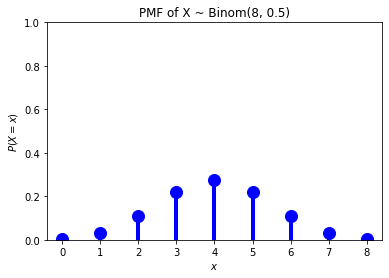

In [4]:
n = 8
p = 0.5
xs = np.arange(0, n + 1)
ys = stats.binom.pmf(xs, n, p)

plot_pmf(xs, ys)
plt.title(f'PMF of X ~ Binom({n}, {p})');

In [5]:
median(xs, ys)

4

Here we have $n=8$ and $p=0.2$.

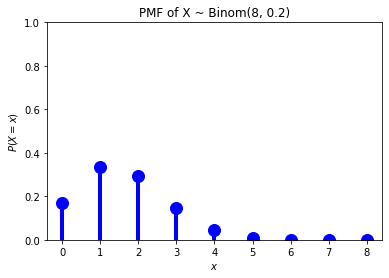

In [6]:
n = 8
p = 0.2
xs = np.arange(0, n + 1)
ys = stats.binom.pmf(xs, n, p)

plot_pmf(xs, ys)
plt.title(f'PMF of X ~ Binom({n}, {p})');

In [7]:
median(xs, ys)

1

**(b)**  Suppose we replace expectation with median in the definition of variance. We should obtain something analogous to mean absolute error for random variables. 

**Definition** For a random variable $X$ we define the median absolute derivation to be $$\text{Median}\left[ | X - X_{\text{median}} | \right]$$ 

**Question** Write a function called `median_absolute_deviation` with 

- Input: a list with `values` of the random variable in ascending order and a list of the corresponding `probabilities`
- Output: the median absolute deviation of the random variable

In [8]:
def median_absolute_deviation(values, probabilities):
    median_value = median(values, probabilities)
    
    new_values = [abs(value - median_value) for value in values]
    new_values = sorted(new_values)
    
    return median(new_values, probabilities)

We can try a few values of the Binomial Distribution. Here we have $n=8$ and $p=0.5$.

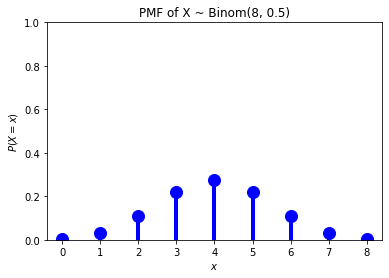

In [9]:
n = 8
p = 0.5
xs = np.arange(0, n + 1)
ys = stats.binom.pmf(xs, n, p)

plot_pmf(xs, ys)
plt.title(f'PMF of X ~ Binom({n}, {p})');

In [10]:
median_absolute_deviation(xs, ys)

2

Here we have $n=8$ and $p=0.2$.

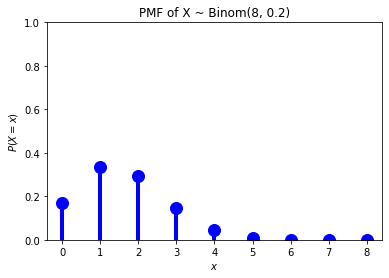

In [11]:
n = 8
p = 0.2
xs = np.arange(0, n + 1)
ys = stats.binom.pmf(xs, n, p)

plot_pmf(xs, ys)
plt.title(f'PMF of X ~ Binom({n}, {p})');

In [12]:
median_absolute_deviation(xs, ys)

1

**(c)** Supose we take the flight delay dataset to represent the probability distribution of a random variable, namely, the flight delay in minutes of an airplane voyage. 

In [13]:
delays = pd.read_csv('united_summer2015.csv')
delays

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
...,...,...,...,...
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1
13824,8/31/15,2013,EWR,-2


Plotting a histogram reminds us to group by delay, count the number of entries in each group, and divide by the total number of flights.

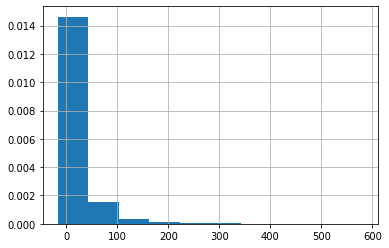

In [14]:
delays['Delay'].hist(density=True,);

In [15]:
delays_grouped = delays["Delay"].value_counts()
delays_grouped = delays_grouped / len(delays)
delays_grouped = delays_grouped.sort_index()
delays_grouped

-16     0.000145
-15     0.000072
-14     0.000072
          ...   
 508    0.000072
 537    0.000072
 580    0.000072
Name: Delay, Length: 293, dtype: float64

We can compute the median and mean absolute deviation along with the expectation and variance.

In [16]:
median(delays_grouped.index, delays_grouped.values)

2

In [17]:
median_absolute_deviation(delays_grouped.index, delays_grouped.values)

9

In [18]:
expectation = sum(delays_grouped.index * delays_grouped.values) 
expectation 

16.658155515370694

In [19]:
variance = sum( delays_grouped.values * ( (delays_grouped.index - expectation)**2 ) )
variance 

1558.6861803230108

Note how these numbers change when we remove outliers. We can restrict to flights that we not delayed by more the 200 minutes. 

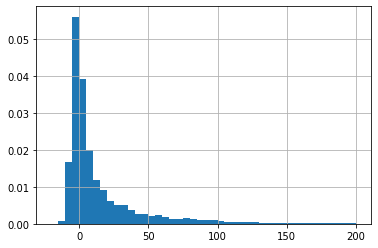

In [20]:
delays['Delay'].hist(density=True, bins=np.arange(-20, 201, 5));

In [125]:
delays_no_outliers = delays[delays["Delay"] < 200]
delays_grouped = delays_no_outliers["Delay"].value_counts()
delays_grouped = delays_grouped / len(delays_no_outliers)
delays_grouped = delays_grouped.sort_index()

In [126]:
median(delays_grouped.index, delays_grouped.values)

2

In [127]:
median_absolute_deviation(delays_grouped.index, delays_grouped.values)

9

In [128]:
expectation = sum(delays_grouped.index * delays_grouped.values) 
expectation 

14.424308747355369

In [129]:
variance = sum( delays_grouped.values * ( (delays_grouped.index - expectation)**2 ) )
variance 

936.8462989950667

The median is robust to the outliers. Note that the values do not change.

### Correlation

We have data about the size of crab shells. The column `presz` measures the size in millimeters before molting. The column `postsz` measures the size in millimeters after molting.

In [84]:
crabs = pd.read_csv("crabs.tsv", sep = r"\s+", header = 0)

crabs

,presz,postsz,inc,year,lf
0,113.6,127.7,14.1,NaN,0
1,118.1,133.2,15.1,NaN,0
2,119.9,135.3,15.4,NaN,0
...,...,...,...,...,...
469,129.6,143.5,13.9,92.0,1
470,134.1,148.3,14.2,92.0,1
471,114.4,129.2,14.8,92.0,1


In [ ]:
We can us a scatter-plot to show the relationship between values. 

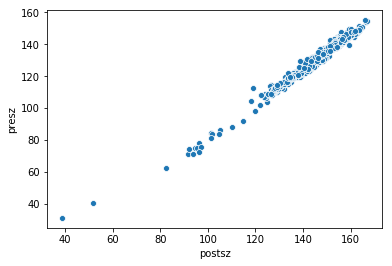

In [86]:
sns.scatterplot(crabs["postsz"], crabs["presz"]);

We can compute the correlation.

In [92]:
variance_postsz = np.mean( (crabs["postsz"] - np.mean(crabs["postsz"]))**2 )
variance_presz = np.mean( (crabs["presz"] - np.mean(crabs["presz"]))**2 )

In [93]:
covariance = np.mean( (crabs["postsz"] - np.mean(crabs["postsz"])) * (crabs["presz"] - np.mean(crabs["presz"])) )

In [94]:
correlation = covariance / (np.sqrt(variance_postsz) * np.sqrt(variance_presz))

In [95]:
correlation

0.9903699282533864

Alternatively we can use pandas

In [97]:
crabs[["presz", "postsz"]].corr()

,presz,postsz
presz,1.00000,0.99037
postsz,0.99037,1.00000
